# SIO113: Practice Problems
### Lecture 20

<div class="alert alert-block alert-info"><b>Preliminaries</b>
    
- Rename this notebook using the format YourLastname_FirstInitial_PP_LectureNumber.ipynb.
    
- Answer each question in a separate cell.
</div>

**1. Cartesian coordinates and polar coordinates**

1. Write a `lambda` functions to replace `dir2cart()` and `cart2dir()`. Call them `dir_cart` and `cart_dir`.
2. You measured a bedding plane with an azimuth of  40 and a plunge of 62. Use your function `dir_cart()` to convert the coordinates to Cartesian coordinates.
3. Use your function `cart_dir()` to convert the Cartesian coordinates back to polar coordinates.
4. Test your functions by calling the `dir2cart()` and `cart2dir()` functions from the lecture.
5. Modify `cart2dir()` to round to the nearest decimal.

In [3]:
#importing packages needed for this problem set
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#creating lambda function to convert polar to cartesian coordinates
dir_cart = lambda Dir : [np.cos(np.radians(Dir[0]))*np.cos(np.radians(Dir[1])), 
                         np.sin(np.radians(Dir[0]))*np.cos(np.radians(Dir[1])), 
                         np.sin(np.radians(Dir[1]))]
#creating lambda function to convert cartesian to polar azimuth and plunge
cart_dir = lambda X : [np.degrees(np.arctan2(X[1],X[0]))%360.0,
                      np.degrees(np.arcsin(X[2]/np.sqrt(X[0]**2+X[1]**2+X[2]**2)))]

In [5]:
#use dir_cart to convert azimuth and plunge coords to cart
polar2cart = dir_cart((40,62))
print('Cartesian coordinates of bedding plane:', polar2cart)

#use cart_dir to convert it back to polar coordinates
cart2polar = cart_dir(polar2cart)
print('Polar coordinates of bedding plane:', cart2polar)

Cartesian coordinates of bedding plane: [0.35963608187451407, 0.3017705036589468, 0.8829475928589269]
Polar coordinates of bedding plane: [40.0, 62.000000000000014]


In [6]:
#using functions from lecture to see if it produces the same result

def dir2cart(Dir):
    """
    Convert polar directions to Cartesian coordinates.
    
    Parameters:
    -----------
    Dir : List of two floats.
        Directions (azimuth `Dir[0]`, plunge `Dir[1]`) in degrees.
      
    Returns:
    --------
    List of three floats defining the Cartesian coordinates (x, y, z).
    """
    
    Az, Pl = np.radians(Dir[0]), np.radians(Dir[1])
    return [np.cos(Az) * np.cos(Pl), np.sin(Az) * np.cos(Pl), np.sin(Pl)]
 
def cart2dir(X):
    """
    Convert Cartesian coordinates to polar azimuth and plunge.
    
    Parameters:
    -----------
    X : List of three floats.
        Cartesian coordinates (x, y, z).
        
    Returns: 
    --------
    [Az, Pl] : List of two floats.
        Polar coordinates (azimuth `Az`, plunge `Pl`) in degrees.
    """
    
    R = np.sqrt(X[0]**2 + X[1]**2 + X[2]**2) # Calculate resultant vector length.
    Az = np.degrees(np.arctan2(X[1], X[0]))%360.0 # Calculate declination taking care of correct quadrants (arctan2) and making modulo 360.
    Pl = np.degrees(np.arcsin(X[2] / R)) # Calculate inclination (converting to degrees).
    return [Az, Pl]

In [7]:
#bedding plane direction
Az, Pl = 40.0, 62.0
#call out the dir2cart function
X = dir2cart([Az, Pl])
print('Cartesian coordinates of X:', X)
#call out the cart2dir function
newAz, newPl = cart2dir(X)
print('Polar coordinates of X:', '%3.1f' % newAz, '%3.1f' % newPl)

Cartesian coordinates of X: [0.35963608187451407, 0.3017705036589468, 0.8829475928589269]
Polar coordinates of X: 40.0 62.0


**2. Unit vectors**

Consider the two striation directions
$$
\vec A = (Az_1, Pl_1) = (245, 22), \\
\vec B = (Az_2, Pl_2) = (10, 60). \\
$$

1. What is the sum of the two vectors, $\vec X_1 + \vec X_2$?
2. What is the difference between the vectors, $\vec X_1 - \vec X_2$?  
3. What is angle between the two vectors $\vec X_1$ and  $\vec X_2$? 
4. What is the pole to the two vectors?  
5. Make an equal angle diagram
    - Plot the two vectors as green triangles.
    - Plot the pole to the plane as a blue star.

In [8]:
#define striation directions
A, B = [245, 22], [10, 60]
#convert cartesian coordinates of A as numpy array
X1 = np.array(dir2cart(A))
#convert cartesian coordinates of B as numpy array 
X2 = np.array(dir2cart(B))
#Cartesian coordinates of vector sum using array addition
C = X1 + X2 
#\n is a newline character
print('Vector sum of X1 + X2 = \n', cart2dir(C))

Vector sum of X1 + X2 = 
 [277.60164627222434, 58.50301615596578]


In [9]:
#components of vector difference C are 
#Cx = Ax - Bx and Cy = Ay - By

#Cartesian coordinates of vector difference
C = X1 - X2 
print('Vector difference of X1 - X2 = \n', cart2dir(C))

Vector difference of X1 - X2 = 
 [226.356374380339, -20.984841068276953]


In [10]:
#define delta to be related to the cosine angle between the two vectors
delta = np.dot(X1, X2)/(np.sqrt(X1[0]**2 + X1[1]**2)*np.sqrt(X2[0]**2+X2[1]**2))
print('Angle between X1 and X2 = \n', np.degrees(np.arccos(delta)))

Angle between X1 and X2 = 
 82.74892887045172


In [11]:
#find the pole to the two vectors 

#redefine X1 and X2 with three components 
X1, X2 = np.array([245, 22, 0]), np.array([10, 60, 0])

#get the cross product of the cartesian coords
C = np.cross(X1, X2)
pole = cart2dir(C)
print('Vector orthogonal to A, B =\n', pole)

Vector orthogonal to A, B =
 [0.0, 90.0]


In [12]:
#math for the equal angle function (preserve shape of things)
EqualAngle = lambda Pl: 90.0 * np.tan(np.radians(90.0 - Pl)/(2.0))

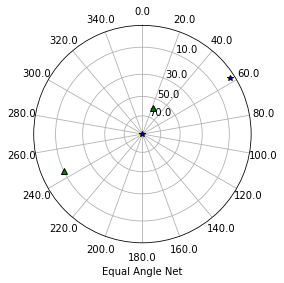

In [13]:
#make a plot instance with polar axes
fig = plt.subplot(111, polar=True)

#set the coordinates (similar to the rose diagram)
fig.set_theta_direction(-1) #reverse direction of degrees (CW)
fig.set_theta_zero_location('N') #specify 0-degrees as North

#need full 90 degrees, so set scale to the following
plt.polar([0.0],[90.0])

#plot first vector as green triangle using equal angle lambda function
plt.polar(np.radians(X1)[0], (EqualAngle(X2)[0]), 'g^', mec = 'black')

#plot second vector as a green triangle 
plt.polar(np.radians(X1)[1], (EqualAngle(X2)[1]), 'g^', mec = 'black')

#plot the pole as a blue star
plt.polar(pole, 'b*', mec = 'black')

#make list of contours to plot 
#use list comprehension
#label the azimuths at 20 degree intervals 
#plt.thetagrids() takes a list of azimuths 
AzContours = np.arange(0.0, 360.0, 20.0)
AzLabels = [str(p) for p in AzContours]
plt.thetagrids(AzContours, AzLabels)

#doing the same for plunges
PlContours = [EqualAngle(a) for a in np.arange(10.0, 90.0, 20.0)] #exclude center or edge
#make list of labels 
PlLabels = [str(a) for a in np.arange(10.0, 90.0, 20.0)]
#draw on the plunge contours and label them
#plt.rgrids() takes a list of plunges (or radii in matplot) and their labels
plt.rgrids(PlContours, PlLabels)
#Label plot 
plt.xlabel('Equal Angle Net');

**3. Vectors with length**

1. Modify the function `dir2cart()` from the lecture to include vector length $R$. Give the modified function the name `vec2cart()`.
2. Apply your new function to evaluate the Cartesian coordinates of the vector with Azimuth=12, Plunge=42, R=8.
3. Modify the function `cart2dir()` to return the full vector (Azimuth, Plunge and $R$) from the Cartesian coordinates.  Give the modified function the name `cart2vec()`.
4. Verify that your function `cart2vec()` works, by feeding the output of `vec2cart()` into `cart2vec()` to make sure you get back what you started with (i.e. Azimuth=12, Plunge=42, R=8).

In [99]:
#modifying the function dir2cart to include vector length R

def vec2cart(Dir):
    """
    Convert polar directions to Cartesian coordinates.
    
    Parameters:
    -----------
    Dir : List of three floats.
        Directions (azimuth `Dir[0]`, plunge `Dir[1]`, vector length 'R[2]') in degrees.
      
    Returns:
    --------
    List of three floats defining the Cartesian coordinates (x, y, z).
    """
    if len(Dir)>2:
        R=Dir[2]
    else:
        R=1
    Az, Pl = np.radians(Dir[0]), np.radians(Dir[1])
    return [R*np.cos(Az)*np.cos(Pl), R*np.sin(Az)*np.cos(Pl), R*np.sin(Pl)]

In [100]:
Az, Pl, R = 12, 42, 8
X = vec2cart([Az, Pl, R])
print('Cartesian coordinates of X:', X)

Cartesian coordinates of X: [5.815242624307648, 1.2360679774997898, 5.353044850870866]


In [101]:
#modifying the function cart2dir to return the full vector

def cart2vec(X):
    """
    Convert Cartesian coordinates to polar azimuth, plunge and vector length.
    
    Parameters:
    -----------
    X : List of three floats.
        Cartesian coordinates (x, y, z).
        
    Returns: 
    --------
    [Az, Pl] : List of two floats.
        Polar coordinates (azimuth `Az`, plunge `Pl`, vector length 'R') in degrees.
    """
    
    Az = np.degrees(np.arctan2(X[1], X[0]))%360.0 # Calculate declination taking care of correct quadrants (arctan2) and making modulo 360.
    Pl = np.degrees(np.arcsin(X[2])/R) # Calculate inclination (converting to degrees).
    return [Az, Pl, R]

In [102]:
OGAz, OGPl, OGR = cart2vec(X)
print('Polar coordinates of X:', OGAz, OGPl, OGR)

Polar coordinates of X: 12.0 nan 8


<ipython-input-101-73eb0156e3cb>:19: RuntimeWarning: invalid value encountered in arcsin
  Pl = np.degrees(np.arcsin(X[2])/R) # Calculate inclination (converting to degrees).


<div class="alert alert-block alert-danger"><b> 
To receive full credit, your notebook:
    
1. Must have the correct name;
2. Must be fully commented;
3. Must run as expected;
4. Must be submitted into Canvas before the deadline.
</b></div>